### Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load rolling windows sequence
sequences = np.load('rolling_window_sequences.npy')

# 2. Load sequence metadata
metadata_df = pd.read_csv('sequence_metadata_with_RUL.csv')

#### 1. Data Overview and Summary Statistics

In [3]:
# Basic info
print(metadata_df.info())

# Summary statistics
print(metadata_df.describe())

# Shape of sequences array
print(f"Sequences shape: {sequences.shape}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152559 entries, 0 to 152558
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   engine_id  152559 non-null  int64  
 1   cycle      152559 non-null  float64
 2   RUL        152559 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 3.5 MB
None
           engine_id          cycle            RUL
count  152559.000000  152559.000000  152559.000000
mean      104.278312     129.285162     164.230206
std        72.523495      81.274328      94.149062
min         1.000000       8.000000       0.000000
25%        44.000000      65.000000      93.000000
50%        88.000000     119.000000     157.000000
75%       163.000000     177.000000     224.000000
max       260.000000     543.000000     527.000000
Sequences shape: (152559, 30, 66)


#### 2. Distribution Analysis

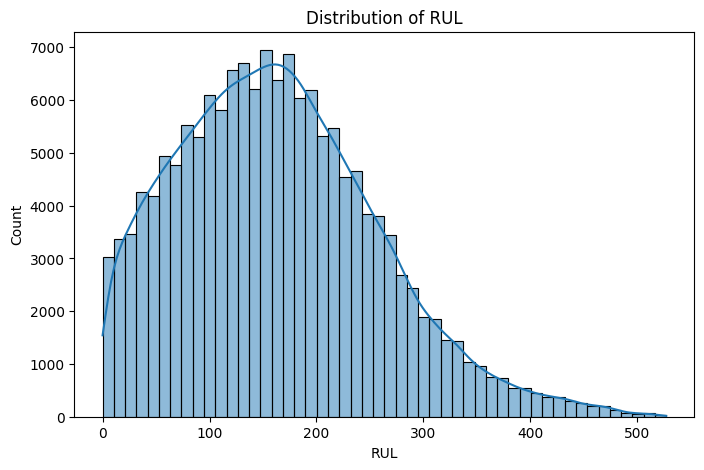

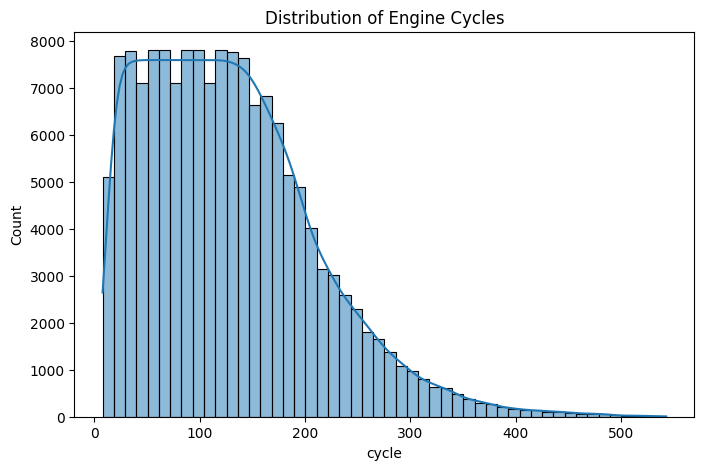

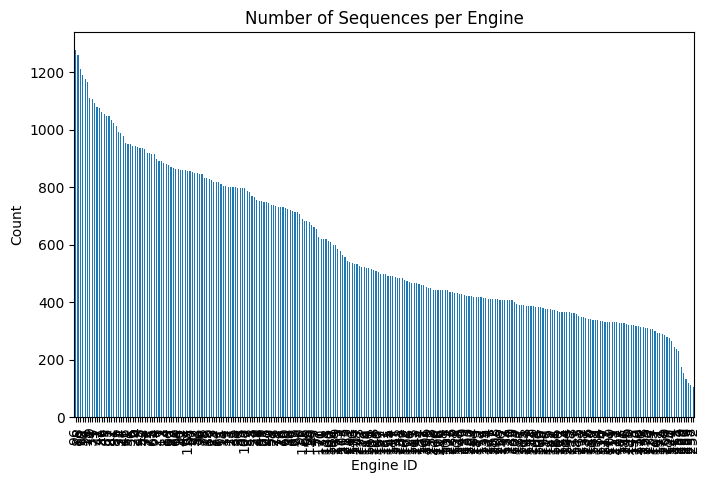

In [4]:
# Distribution of RUL
plt.figure(figsize=(8,5))
sns.histplot(metadata_df['RUL'], bins=50, kde=True)
plt.title('Distribution of RUL')
plt.show()

# Distribution of cycles
plt.figure(figsize=(8,5))
sns.histplot(metadata_df['cycle'], bins=50, kde=True)
plt.title('Distribution of Engine Cycles')
plt.show()

# Count sequences per engine
plt.figure(figsize=(8,5))
metadata_df['engine_id'].value_counts().plot(kind='bar')
plt.title('Number of Sequences per Engine')
plt.xlabel('Engine ID')
plt.ylabel('Count')
plt.show()

#### 3. Time Series/Sequence Visualization

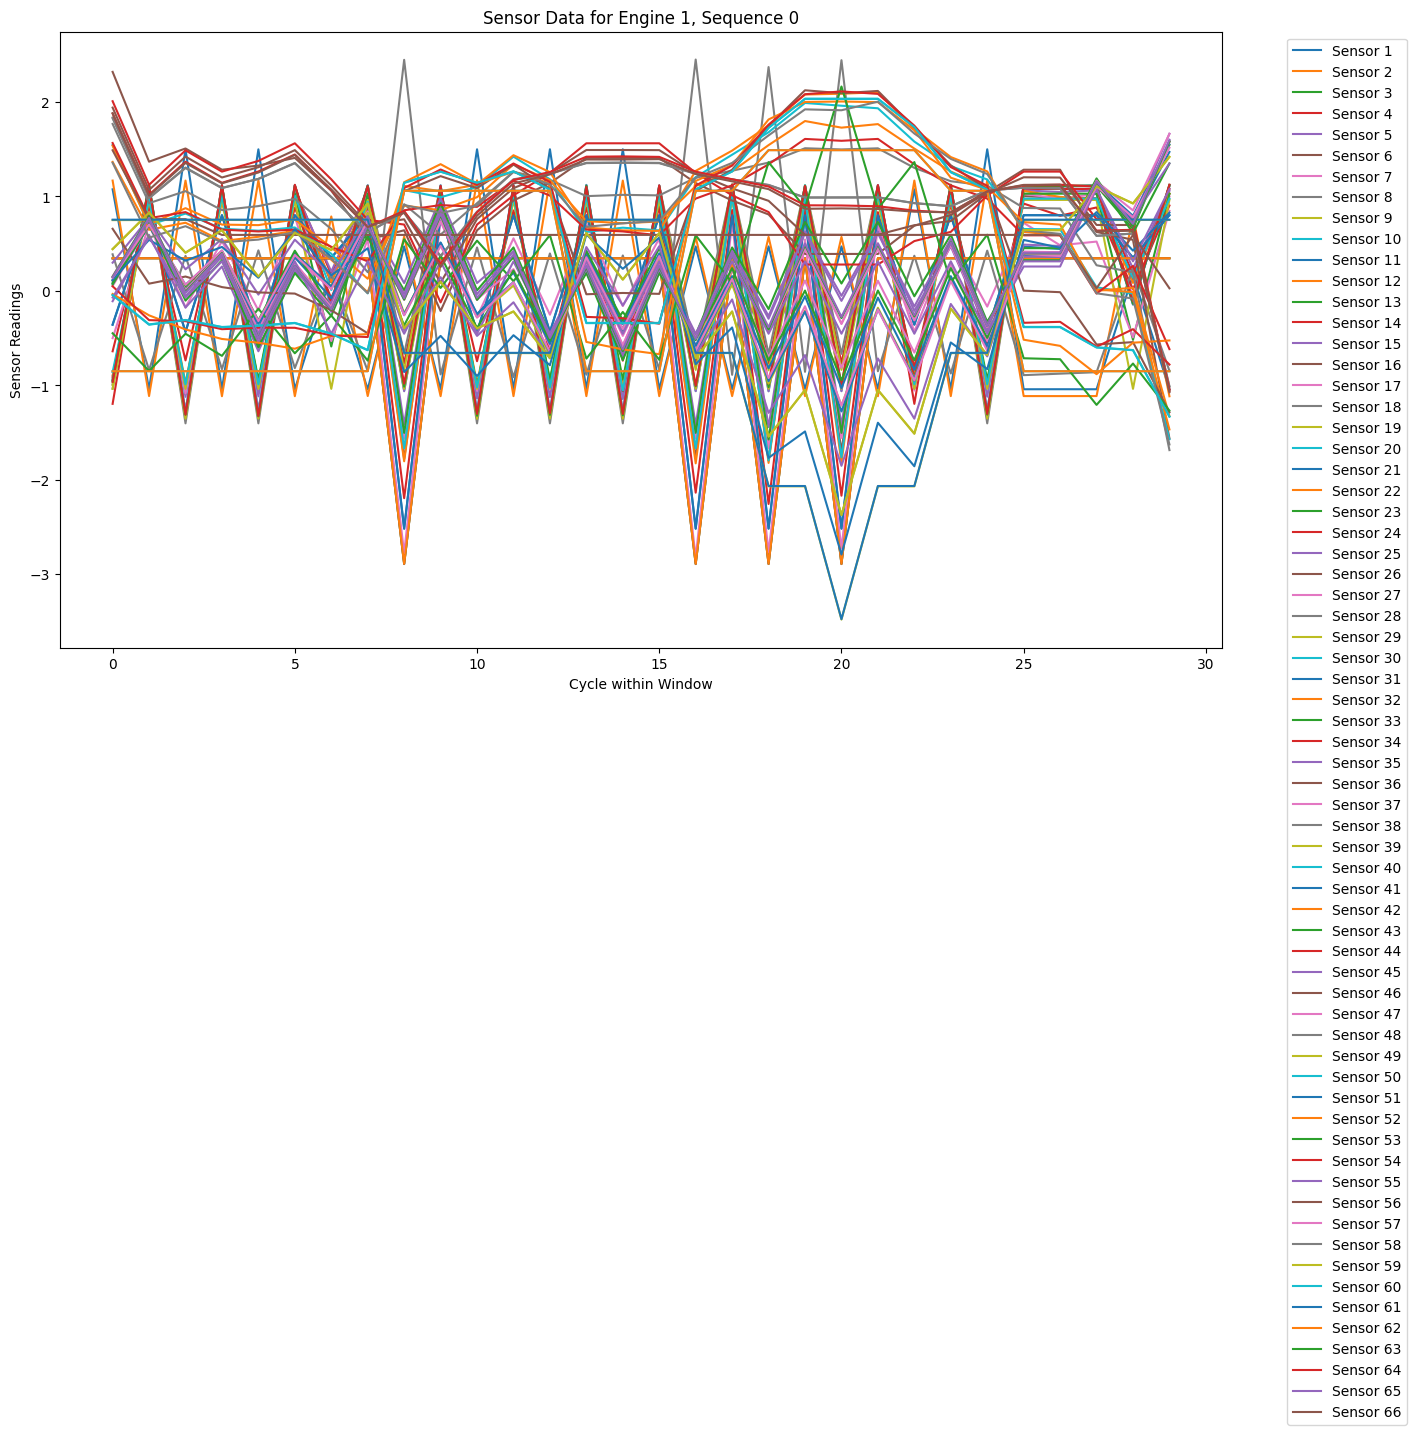

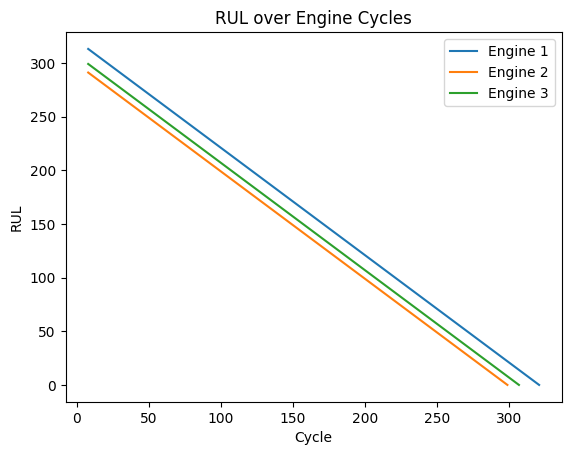

In [5]:
# Plot sensor data for a specific engine and sequence index
engine_id = metadata_df['engine_id'].iloc[0]
sequence_idx = 0
plt.figure(figsize=(15,8))
for feature_idx in range(sequences.shape[2]):  # iterate features
    plt.plot(sequences[sequence_idx, :, feature_idx], label=f'Sensor {feature_idx+1}')
plt.title(f'Sensor Data for Engine {engine_id}, Sequence {sequence_idx}')
plt.xlabel('Cycle within Window')
plt.ylabel('Sensor Readings')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot RUL over cycles for a few engines
for eid in metadata_df['engine_id'].unique()[:3]:
    subset = metadata_df[metadata_df['engine_id']==eid]
    plt.plot(subset['cycle'], subset['RUL'], label=f'Engine {eid}')
plt.title('RUL over Engine Cycles')
plt.xlabel('Cycle')
plt.ylabel('RUL')
plt.legend()
plt.show()

#### 4. Correlation Analysis

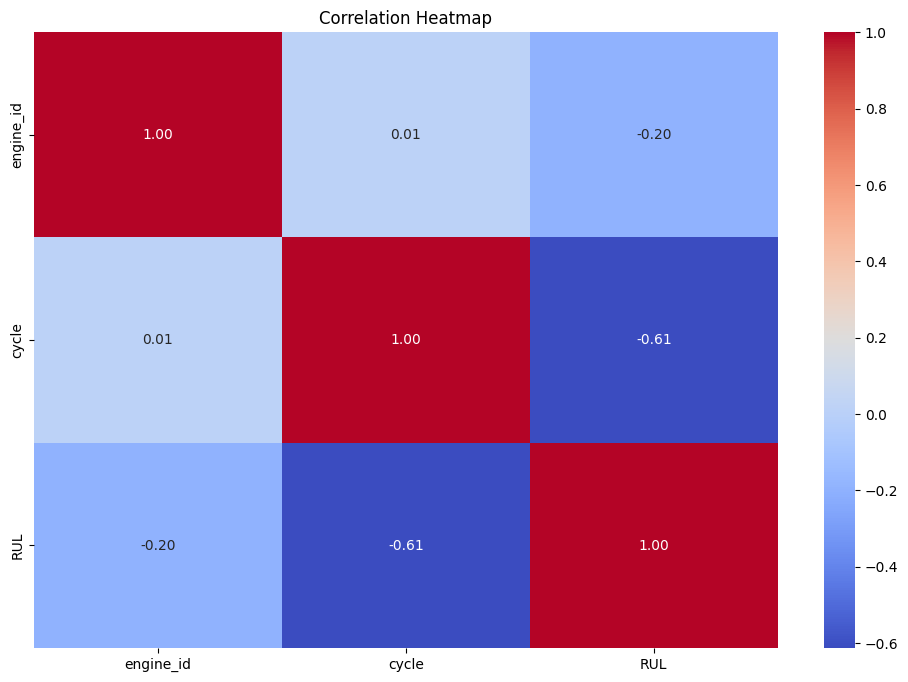

In [6]:
# Correlation of metadata features including RUL
correlations = metadata_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### 5. Outlier Detection

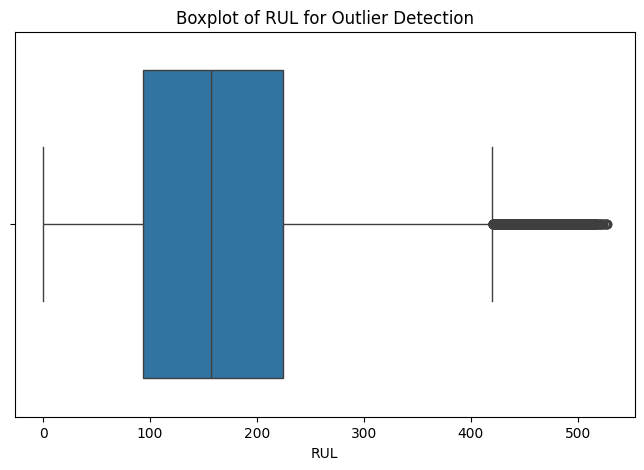

In [7]:
# Boxplot for RUL to detect outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=metadata_df['RUL'])
plt.title('Boxplot of RUL for Outlier Detection')
plt.show()

#### 6. Feature Distribution Over RUL

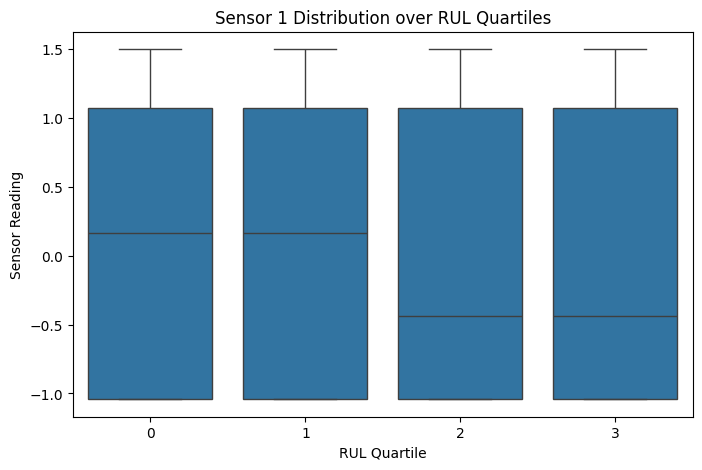

In [8]:
# Boxplot of a sensor feature vs RUL quartiles
metadata_df['RUL_quartile'] = pd.qcut(metadata_df['RUL'], 4, labels=False)
feature_idx = 0  # sensor feature index
plt.figure(figsize=(8,5))
sns.boxplot(x=metadata_df['RUL_quartile'], y=sequences[:, -1, feature_idx])  
# using last cycle in each sequence for the feature
plt.title(f'Sensor {feature_idx+1} Distribution over RUL Quartiles')
plt.xlabel('RUL Quartile')
plt.ylabel('Sensor Reading')
plt.show() 

#### 7. Missing Values and Data Quality

In [9]:
# Check for missing values in metadata
print(metadata_df.isnull().sum())

# If metadata has no missing, check sequences for NaNs
print(np.isnan(sequences).sum())

engine_id       0
cycle           0
RUL             0
RUL_quartile    0
dtype: int64
0


#### 8. Engine-wise Analysis

In [10]:
# Mean sensor readings per engine (last cycle in window)
engine_means = {}
for eid in metadata_df['engine_id'].unique():
    idxs = np.where(metadata_df['engine_id'] == eid)[0]
    engine_means[eid] = np.mean(sequences[idxs, -1, :], axis=0)

# Convert to DataFrame for comparison
engine_mean_df = pd.DataFrame.from_dict(engine_means, orient='index')
print(engine_mean_df.head())

         0         1         2         3         4         5         6   \
1 -0.288618 -0.311275  0.080728  0.297121  0.287561  0.268276  0.277158   
2 -0.287052 -0.299178  0.072684  0.300531  0.288694  0.273630  0.277822   
3 -0.206938 -0.217234  0.063982  0.213640  0.208228  0.197831  0.200645   
4 -0.266128 -0.286167  0.077335  0.275391  0.274700  0.281948  0.300945   
5 -0.455458 -0.485101  0.127163  0.463526  0.454633  0.448696  0.470727   

         7         8         9   ...        56        57        58        59  \
1  0.307988  0.308204  0.306159  ...  0.509186  0.266838  0.421217 -0.020256   
2  0.306529  0.306402  0.306244  ...  0.514340  0.252445  0.415060  0.009179   
3  0.219979  0.221038  0.223229  ...  0.378838  0.269028  0.308298  0.020338   
4  0.283628  0.285639  0.279848  ...  0.533135  0.306788  0.395151 -0.006874   
5  0.478574  0.480862  0.475671  ...  0.839541 -0.189213  0.653325 -0.261413   

         60        61        62        63        64        65  
1  0

#### Observations:

1. Data Size and Structure: The dataset contains 152,559 rolling window sequences, each with a window size of 30 cycles and 66 features.

2. Target Variable Distribution (RUL): The distribution of the Remaining Useful Life (RUL) is positively (right) skewed, indicating that a majority of the observed sequences are far from failure (have a high RUL).

3. RUL vs. Cycle Trend: There is a strong negative linear relationship between the cycle number (time) and the RUL, meaning RUL consistently decreases as the engine operates longer.

4. Sensor Feature Variability: When visualizing the time-series data for individual sequences, some sensors exhibit strong fluctuations (high variance), while others remain very stable (close to 0).

5. Feature Correlation: The cycle and RUL features are strongly negatively correlated in the metadata, which is expected since RUL is derived from the cycle count.